In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *

import gc
torch.cuda.empty_cache()
gc.collect()

%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
# csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
# X = X.reshape((610,340, 103))
X = X.reshape((1096, 715, 102))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 29
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

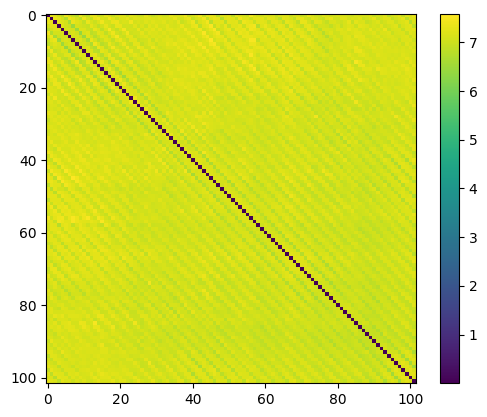

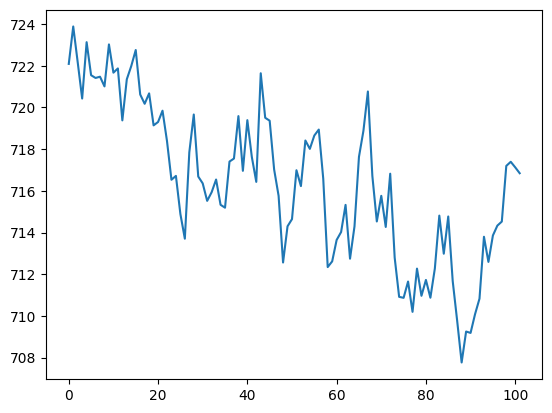

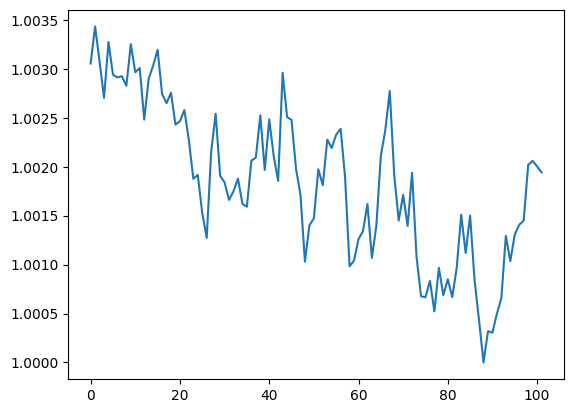

In [3]:
from MetaLearner import HDDOnBands

distances = HDDOnBands.run(X)

show_distances(distances)


weights, dist_batches = HDDOnBands.createL1WeightedBatches(X, normalize=False)

show_weights(weights, is_normalized=False)

levels = find_levels(weights)
show_weights(levels, is_normalized=False)

XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  2.795966148376465
XXXXXXX IN CLASSIFICATION XXXXXXXXX
Train Accuracy:  0.8977973492504451
Test Accuracy:  0.8677019607843137


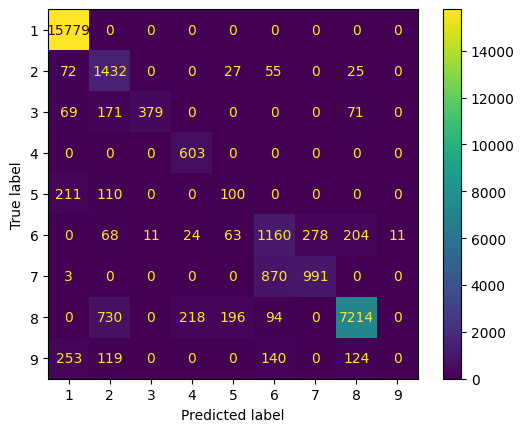

In [4]:
import gc
torch.cuda.empty_cache()
gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common')

confusion_mat(test_gt,test_preds, range(1,10))


tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=torch.int32)
[tensor([0, 1, 2, 3, 4, 5, 6, 7], dtype=torch.int32), tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=torch.int32), tensor([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
         35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
       dtype=torch.int32)]
TOTAL TIME FOR METHOD:  10.279589891433716
Train Accuracy:  0.9157503121964756
Test Accuracy:  0.8340034113060428


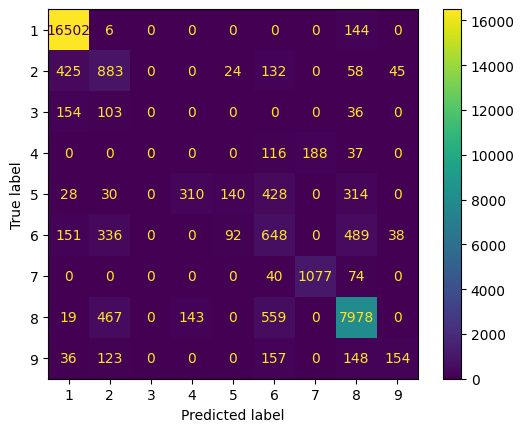

In [5]:
import gc
torch.cuda.empty_cache()
gc.collect()

weights, dist_batches = HDDOnBands.createUniformWeightedBatches(X, clusters_amount=3)

# print(dist_batches[1])

# print(dist_batches)

train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

confusion_mat(test_gt,test_preds, range(1,10))
